# Generating Random Data 

## Introduction

- In this project, we generated random data to simulate a real-world dataset that represents employees' experience, salary, and other relevant attributes. 

- 📊 How We Generated the Data
We used Python's NumPy and Pandas and matplotlib libraries to create a dataset with random values. 

### Steps for Data Generation

Step 1: Generate Random Data
We'll create a dataset with:

- ID: Unique identifier
- Age: Random age between 18 and 60
- Height: Random height (in cm)
- Weight: Random weight (in kg)
- Salary: Random salary between 30,000 and 200,000
-  Gender: Randomly assign "Male" or "Female".
- Job Type: Randomly assign job categories like "Engineer", "Doctor", "Teacher", etc.
- Experience (Years): Generate experience based on age.
- Normalize Height & Weight: Standardize the values.
- Classify Salary into Categories: "Low", "Medium", and "High".

### Importing libraries

In [26]:
# import libraries
import numpy as np #  for numerical and mathematical calculations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns  # for high-level visualization




In [27]:
# Generate data  #for reproducibility
np.random.seed(42)  
dates = pd.date_range(start="2025-01-01", end="2025-01-30")
products = ['Product A', 'Product B', 'Product C']
sales_data = {
    'Date': np.random.choice(dates, 100),
    'Product': np.random.choice(products, 100),
    'Units Sold': np.random.randint(1, 20, 100),
    'Unit Price': np.random.uniform(5, 50, 100).round(2)
}


In [28]:
# Create DataFrame
df = pd.DataFrame(sales_data)
df['Total Sales'] = df['Units Sold'] * df['Unit Price']
print(df.head())


        Date    Product  Units Sold  Unit Price  Total Sales
0 2025-01-07  Product B           7       34.34       240.38
1 2025-01-20  Product B           1       15.09        15.09
2 2025-01-29  Product B           1       37.05        37.05
3 2025-01-15  Product C          13       15.68       203.84
4 2025-01-11  Product C           9       19.64       176.76


In [29]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 200

# Define possible job categories
job_types = ["Engineer", "Doctor", "Teacher", "Artist", "Lawyer", "Scientist", "Nurse", "Technician"]


In [30]:
# Generate random data
data = {
    "ID": np.arange(1, num_samples + 1),
    "Gender": np.random.choice(["Male", "Female"], num_samples),  # Random gender
    "Age": np.random.randint(18, 60, num_samples),
    "Height": np.random.normal(170, 10, num_samples),  # Normal distribution
    "Weight": np.random.normal(70, 15, num_samples),
    "Salary": np.random.randint(30000, 200000, num_samples),
    "Job Type": np.random.choice(job_types, num_samples)  # Random job type
}


In [31]:
# Create DataFrame
df = pd.DataFrame(data)

In [32]:
print(df.head())

   ID  Gender  Age      Height     Weight  Salary   Job Type
0   1    Male   49  176.351126  75.109229  184782   Engineer
1   2  Female   56  159.197991  69.793331  190558     Doctor
2   3    Male   49  156.943024  90.585667  101907    Teacher
3   4    Male   21  162.492382  59.833209  158876   Engineer
4   5    Male   47  159.745001  87.302978   94435  Scientist


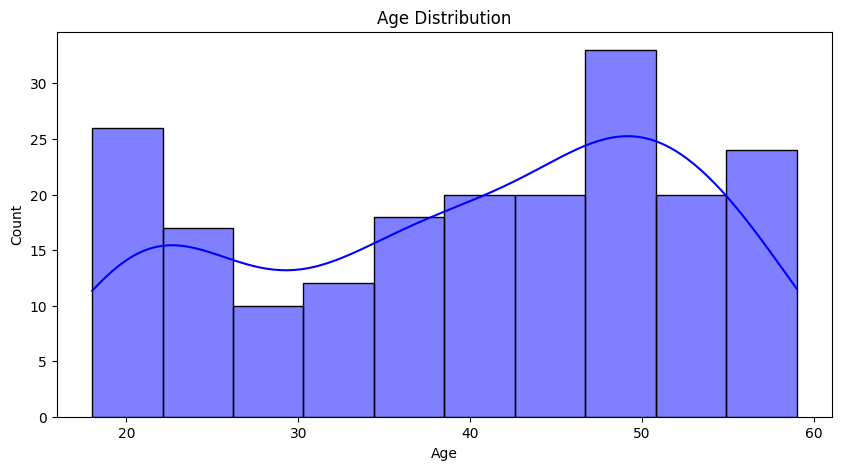

In [33]:
#Data Visualization
plt.figure(figsize=(10, 5))

 #Histogram for Age Distribution
plt.plot
sns.histplot(df["Age"], bins=10, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

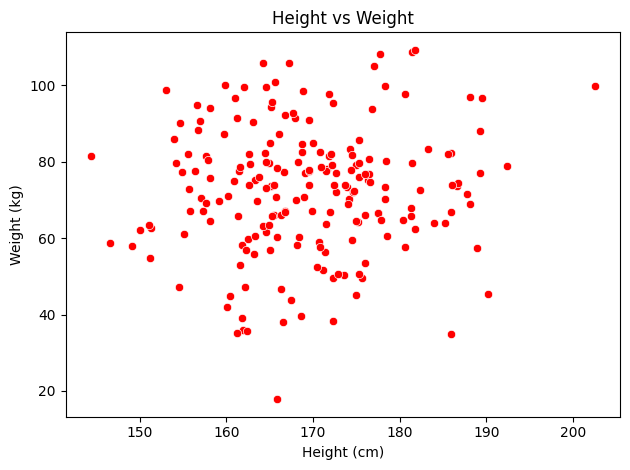

In [34]:
# Scatter Plot: Height vs Weight
plt.plot
sns.scatterplot(x=df["Height"], y=df["Weight"], color="red")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs Weight")

plt.tight_layout()
plt.show()


In [35]:
# Add experience column (based on age)
df["Experience"] = df["Age"] - np.random.randint(16, 25, num_samples)  # Assuming they started working at 16-25
df["Experience"] = df["Experience"].apply(lambda x: max(0, x))  # Ensure no negative values


In [36]:
# Normalize height and weight
df["Height (Normalized)"] = (df["Height"] - df["Height"].mean()) / df["Height"].std()
df["Weight (Normalized)"] = (df["Weight"] - df["Weight"].mean()) / df["Weight"].std()


In [37]:
# Categorize salary into Low, Medium, and High
def categorize_salary(salary):
    if salary < 70000:
        return "Low"
    elif salary < 140000:
        return "Medium"
    else:
        return "High"
df["Salary Category"] = df["Salary"].apply(categorize_salary)
# Display first few rows
print(df.head())

   ID  Gender  Age      Height     Weight  Salary   Job Type  Experience  \
0   1    Male   49  176.351126  75.109229  184782   Engineer          27   
1   2  Female   56  159.197991  69.793331  190558     Doctor          39   
2   3    Male   49  156.943024  90.585667  101907    Teacher          30   
3   4    Male   21  162.492382  59.833209  158876   Engineer           0   
4   5    Male   47  159.745001  87.302978   94435  Scientist          29   

   Height (Normalized)  Weight (Normalized) Salary Category  
0             0.704001             0.152999            High  
1            -1.020552            -0.166478            High  
2            -1.247263             1.083106          Medium  
3            -0.689338            -0.765064            High  
4            -0.965556             0.885822          Medium  


C:\Users\MINE\AppData\Local\Temp\ipykernel_13940\23035700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Salary", data=df, palette="cool")


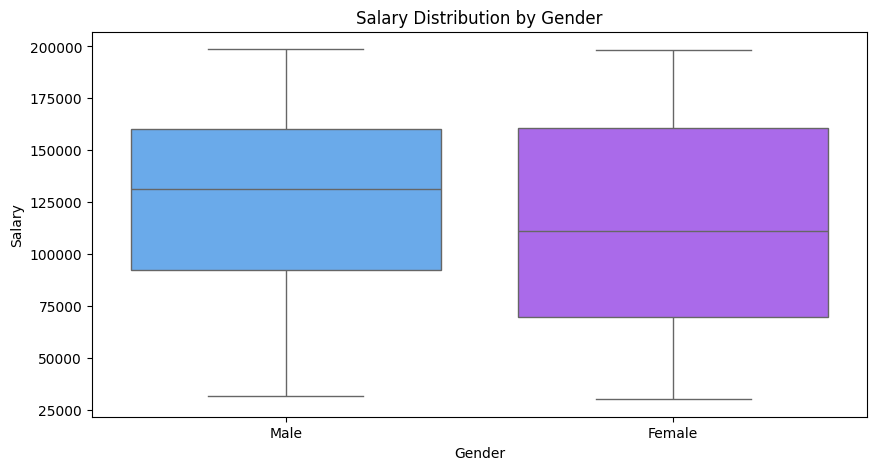

In [38]:

# Visualization: Salary Distribution by Gender
plt.figure(figsize=(10, 5))
sns.boxplot(x="Gender", y="Salary", data=df, palette="cool")
plt.title("Salary Distribution by Gender")
plt.show()

In [39]:
# Correlation Coefficient

# If correlation is close to 1, Salary and Experience have a strong positive relationship.
# If correlation is close to 0, there is no strong relationship.

# Check correlation between Salary and Experience
correlation = df["Salary"].corr(df["Experience"])
print(f"Correlation between Salary and Experience: {correlation:.2f}")

Correlation between Salary and Experience: -0.05


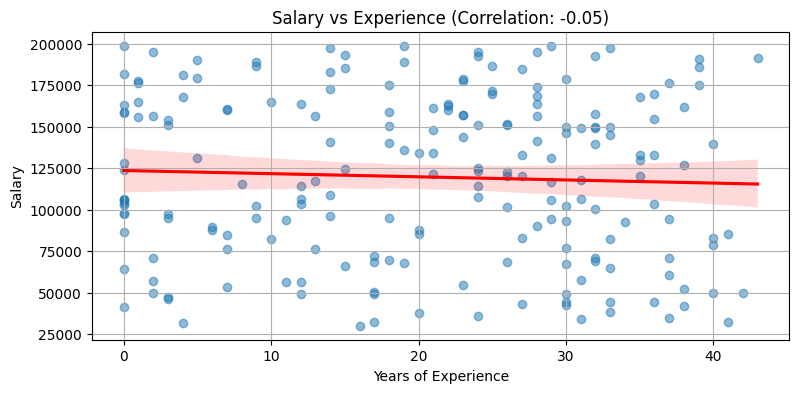

In [40]:
# Regression Line in Scatter Plot

# If the points align closely with the red line, the relationship is strong.
# If points are widely scattered, the relationship is weak.

# Scatter plot with regression line
plt.figure(figsize=(9, 4))
sns.regplot(x="Experience", y="Salary", data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title(f"Salary vs Experience (Correlation: {correlation:.2f})")
plt.grid(True)
plt.show()

## DATA VISUALIZATION

### LINE GRAPH

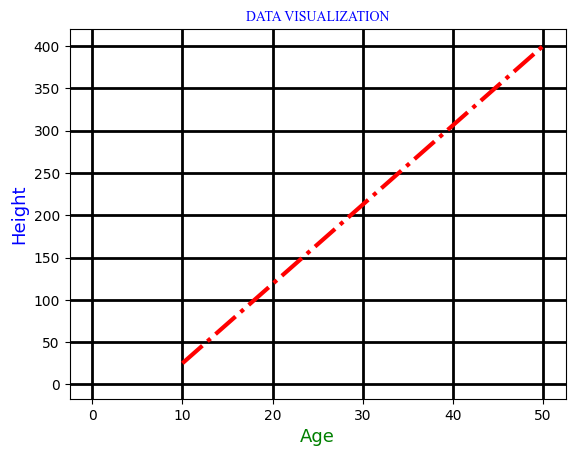

In [59]:
from numpy import array

font_create = {
    'color': 'blue',
    'font': 'Times New Roman',
    'size': 10
}

x_axis = np.array([10, 50])  #represents the x-values  (Age)
y_axis = np.array([25, 400]) # represents the y-values (Height)

# plt.plot(x_axis, y_axis '*', ms=20, mec='red', mfc='black)
plt.plot(2,3,4)
plt.plot(x_axis, y_axis, ls='dashdot', c='r', lw=3.0)
plt.title('DATA VISUALIZATION', fontdict=font_create, loc='center')
# Labels with correct font dictionary
plt.ylabel('Height', fontdict={'color': 'blue', 'size': 13}) #Sets the y-axis label to "Height" (in blue).
plt.xlabel('Age', fontdict={'color': 'green', 'size': 13})  # represents the x-values ( Age)
plt.grid(lw=2.0,c='k') ##lw=2.0 (or linewidth=2.0) makes the grid thicker.
                       ##c='k' (or color='k') sets the grid color to black.



- This is a simple line chart showing the relationship between Age (x-axis) and Height (y-axis).
 - Red dash-dot line represents the trend between these values.
 - The title, labels, and grid lines enhance readability.



In [42]:
# Data for the first plot
x = np.array([20, 150])
y = np.array([50, 350])

In [43]:
# Data for the second plot
xdata = np.array([20, 40, 14, 2])
ydata = np.array([11, 20, 10, 50])

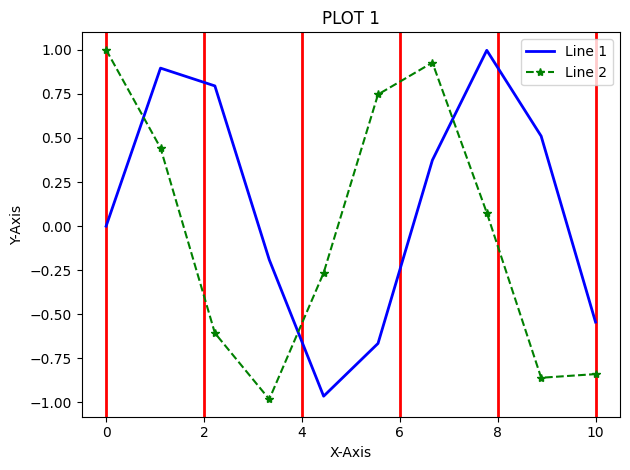

In [60]:
# plot configuration
plt.plot(2, 1, 1)  # plot position in a 2x3 grid
plt.plot(x, y, label='Line 1', color='blue', lw=2.0)  # Plot 1: Line with custom style
plt.plot(xdata, ydata, marker='*', label='Line 2', color='green', linestyle='dashed')  # Plot 2: Line with markers
plt.title('PLOT 1')  # Title of the subplot
plt.xlabel('X-Axis')  # X-axis label
plt.ylabel('Y-Axis')  # Y-axis label
plt.grid(axis='x', c='red', lw=2.0)  # Grid lines for the x-axis
plt.legend()  # Add legend for better interpretation
plt.tight_layout()  # Adjust layout to prevent overlaps
plt.show()


- Title, X & Y labels added.
- Grid lines  (red, thick).
- Legend added for better readability.
- Two different lines:

    - Blue solid line
    - Green dashed line with markers

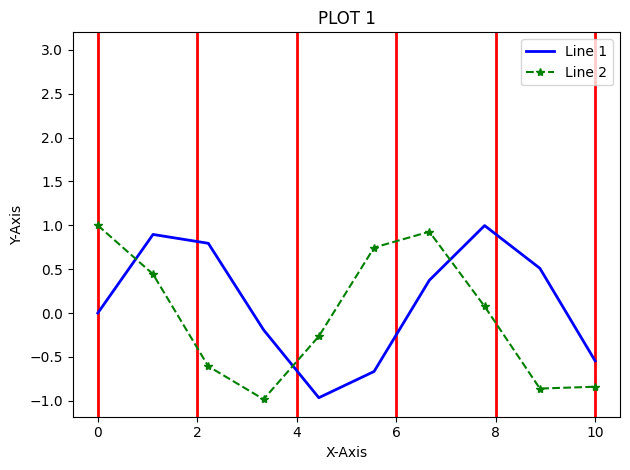

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Data
x = np.linspace(0, 10, 10)
y = np.sin(x)
xdata = np.linspace(0, 10, 10)
ydata = np.cos(xdata)

# Subplot Configuration
plt.plot(2, 3, 1)  # Defines a 2x3 grid and selects the first subplot

# Plotting two lines
plt.plot(x, y, label='Line 1', color='blue', lw=2.0)  # Solid blue line
plt.plot(xdata, ydata, marker='*', label='Line 2', color='green', linestyle='dashed')  # Green dashed line with markers

# Titles and labels
plt.title('PLOT 1')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Grid and Legend
plt.grid(axis='x', c='red', lw=2.0)  # Red grid lines only for x-axis
plt.legend()  # Display legend

# Adjust layout and show
plt.tight_layout()
plt.show()


- Two different lines:

- Blue solid line (sin(x))
- Green dashed line with markers (cos(x)).
-  Title, X & Y labels added.
-  Grid lines only on the x-axis (red, thick).
-  Legend added for better readability.
- Layout adjusted to prevent overlapping.

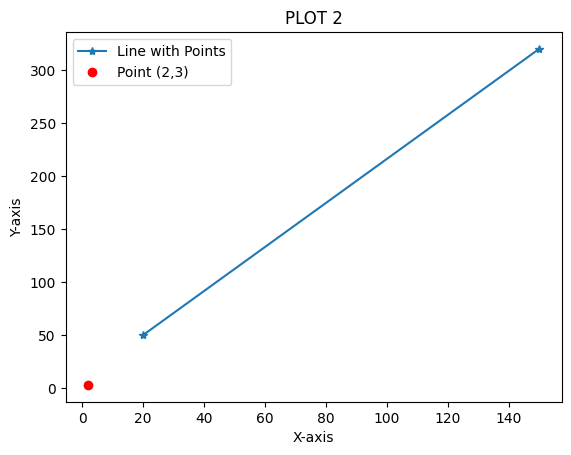

In [47]:

# Define points
x_point = np.array([20, 150])
y_point = np.array([50, 320])

# Plot points
plt.plot(x_point, y_point, marker='*', label='Line with Points')

# Plot a single point (2, 3)
plt.plot(2, 3, 'ro', label='Point (2,3)')

# Add title and labels
plt.title('PLOT 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show legend
plt.legend()

# Display the plot
plt.show()


- A line connecting the points (20, 50) and (150, 320).
- A red circle at the point (2, 3).
- The plot titled "PLOT 2".
- Labels for the X and Y axes.
- A legend that identifies the two parts: the line with points and the single red point.


Text(0.5, 1.0, 'PLOT 3')

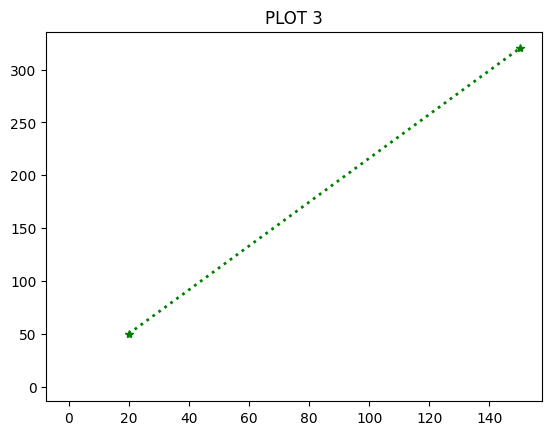

In [48]:
#plot 4
x2=np.array([20,150])
y1=np.array([50,320])
plt.plot(2,3,2)
plt.plot(x2,y1, ls='dotted', lw=2.0, marker='*', c='green')
plt.title('PLOT 3')


- The line style is changed to dotted, giving it a dotted appearance rather than a solid line.
- The line width (lw) is increased to 2.0, making the line thicker.
- Star-shaped markers (*) are added at the data points (20, 50) and (150, 320).
- The color of both the line and the markers is set to green ('green').
- The plot is titled as "PLOT 3"

### BAR AND PIE CHART,SCATTER 

- The graph is designed to visualize the distribution of students across different grades (A, B, C, D, F). It uses two types of visualizations:
  1. Bar Chart: To show the absolute number of students in each grade.
2. Pie Chart: To show the percentage distribution of students across grades.

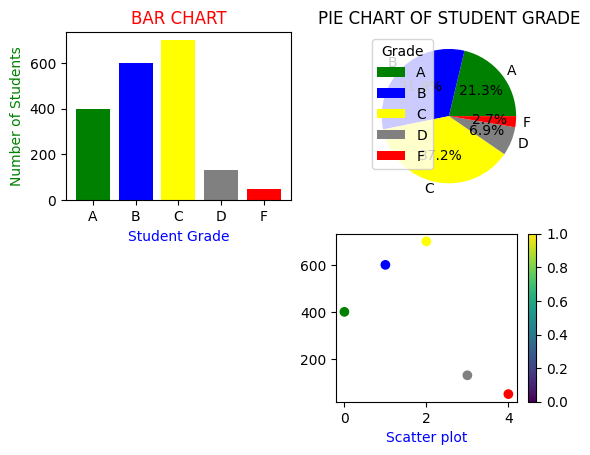

In [61]:

#[400,600,700,130,50]
# Data
student_grade = np.array(['A', 'B', 'C', 'D', 'F'])
number_of_students = np.array([400, 600, 700, 130, 50])
colors = ['green', 'blue', 'yellow', 'grey', 'red']

# Bar Chart
plt.subplot(2, 2,1 )
plt.bar(student_grade, number_of_students, color=colors)
plt.title('BAR CHART', c='red')
plt.xlabel('Student Grade', c='blue')
plt.ylabel('Number of Students', c='green')

# Total sum of students
total_sum = np.sum(number_of_students)

# Calculate percentages
percentage = (number_of_students / total_sum) * 100

# Pie Chart
plt.subplot(2, 2, 2)  # Change this to subplot(1, 2, 2) for proper placement
plt.pie(percentage, labels=student_grade, colors=colors, autopct='%1.1f%%')
plt.legend(title='Grade', loc='best')
plt.title('PIE CHART OF STUDENT GRADE')

#Scatter plot
plt.subplot(2,2,4)
default_xaxis=np.array([0,1,2,3,4])
plt.scatter(default_xaxis, number_of_students, c=colors)
plt.grid
plt.xlabel('Scatter plot', c='blue')
plt.colorbar()

# Show both plots
plt.show()


- Interpretation:

- The bar chart shows the absolute count of students for each grade.
- Grade A has 400 students.
- Grade B has 600 students.
- Grade C has 700 students, and so on.
- The height of each bar corresponds to the number of students in each grade, with different colors for better clarity.

- Interpretation:

- The pie chart shows the percentage distribution of students across the grades.
- Each slice of the pie represents a grade, and the size of each slice corresponds to the proportion of students in that grad
- Grade A takes up 21.3% of the total students.
- Grade B takes up 31.9%, and so on.
- The colors of the pie chart are the same as those used in the bar chart, making it easier to correlate the two charts visually.

In [50]:
# calculates the total number of students by manually adding the individual counts for each grade.
total_sum=number_of_students[0]+number_of_students[1]+number_of_students[2]+number_of_students[3]+number_of_students[4]
print(total_sum)   #1880

1880


In [51]:
# using np.sum() to calculate the sum of the entire array 
# Total sum of students
total_sum = np.sum(number_of_students)
print(total_sum)

1880


In [52]:
#percentage of a single side
firstside=(number_of_students[0]/total_sum)*100  #firstside: 21.3 (Grade A)
secondside=(number_of_students[1]/total_sum)*100   #secondside: 31.9 (Grade B)
thirdside=(number_of_students[2]/total_sum)*100   #thirdside: 37.2 (Grade C)
fourthside=(number_of_students[3]/total_sum)*100   #fourthside: 6.9 (Grade D)
fifthside=(number_of_students[4]/total_sum)*100    #fifthside: 2.7 (Grade F)

print(firstside , secondside, thirdside, fourthside, fifthside)

21.27659574468085 31.914893617021278 37.234042553191486 6.914893617021277 2.6595744680851063


- This output represents the percentage of students in each grade, where:

- 21.3% of students are in Grade A,
- 31.9% of students are in Grade B,
- 37.2% of students are in Grade C,
- 6.9% of students are in Grade D,
- 2.7% of students are in Grade F.
       - Conclusion: this calculates the percentage of students in each grade relative to the total number of students (1880)